In [ ]:
import pandas as pd

games = pd.read_csv('games.csv')
games

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,losing_team,tying_team_home,tying_team_away,fav_or_dog_won,margin_of_victory,spread_result,spread_winner,spread_loser,push_team_home,push_team_away
0,4040,9/7/1986,1986,1,False,Buffalo Bills,24.0,28.0,New York Jets,NYJ,...,BUF,NaN,NaN,fav,4.0,dog,BUF,NYJ,NaN,NaN
1,4041,9/7/1986,1986,1,False,Chicago Bears,41.0,31.0,Cleveland Browns,CHI,...,CLE,NaN,NaN,fav,10.0,dog,CLE,CHI,NaN,NaN
2,4042,9/7/1986,1986,1,False,Denver Broncos,38.0,36.0,Los Angeles Raiders,DEN,...,LVR,NaN,NaN,fav,2.0,dog,LVR,DEN,NaN,NaN
3,4043,9/7/1986,1986,1,False,Green Bay Packers,3.0,31.0,Houston Oilers,GB,...,GB,NaN,NaN,dog,28.0,dog,TEN,GB,NaN,NaN
4,4044,9/7/1986,1986,1,False,Kansas City Chiefs,24.0,14.0,Cincinnati Bengals,CIN,...,CIN,NaN,NaN,dog,10.0,dog,KC,CIN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9186,13226,1/22/2022,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,...,TEN,NaN,NaN,dog,3.0,dog,CIN,TEN,NaN,NaN
9187,13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,...,BUF,NaN,NaN,fav,6.0,fav,KC,BUF,NaN,NaN
9188,13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,...,TB,NaN,NaN,dog,3.0,dog,LAR,TB,NaN,NaN
9189,13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,...,KC,NaN,NaN,dog,3.0,dog,CIN,KC,NaN,NaN


## Regression model to predict over/under line and total points

subset data into DF containing only o/u line, total points, and three weather data columns

In [ ]:
weather = games[['over_under_line', 'total_points', 'weather_temperature', 'weather_wind_mph', 'weather_detail']]
weather

,over_under_line,total_points,weather_temperature,weather_wind_mph,weather_detail
0,40.0,52.0,56.0,12.0,NaN
1,38.0,72.0,55.0,9.0,NaN
2,38.5,74.0,49.0,9.0,NaN
3,41.5,34.0,48.0,7.0,NaN
4,47.0,38.0,56.0,11.0,NaN
...,...,...,...,...,...
9186,48.5,35.0,35.0,0.0,NaN
9187,54.0,78.0,35.0,6.0,NaN
9188,48.0,57.0,50.0,11.0,NaN
9189,54.5,51.0,41.0,4.0,NaN


Simple regression model to predict total points scored with the over/under line as a predictor to see how good the sports books are at predicting the total points

In [ ]:

x = weather['over_under_line']
y = weather['total_points']


import statsmodels.api as sm

# Adding a constant to get an intercept
x_sm = sm.add_constant(x)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y, x_sm).fit()

# Printing the parameters
lr.params

const              4.995060
over_under_line    0.896771
dtype: float64

In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.rsquared

0.09514498312989017

plot regression

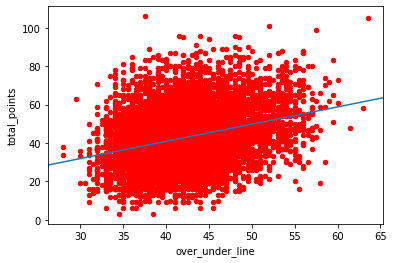

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot

# scatter-plot data
ax = weather.plot(x='over_under_line', y='total_points', kind='scatter', color='red')

# plot regression line
abline_plot(model_results=lr, ax=ax)

plt.show()


multiple regression to predict total points

In [ ]:
from sklearn.linear_model import LinearRegression

#drop all games in a dome - weather does not matter
weather = weather[weather.weather_detail != 'DOME']
#drop rows missing temperature and wind data
weather = weather.dropna(subset=['weather_temperature', 'weather_wind_mph'])

#get categorical columns for weather condition details
conditions = pd.get_dummies(weather, drop_first=True)

x = conditions.drop('total_points', axis=1)
y = conditions['total_points']

#split into train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 19)

#create model
model = LinearRegression()
model.fit(x_train, y_train)

#print summary of the model
model.intercept_, model.coef_, model.score(x_train, y_train)

# from sklearn.metrics import r2_score
# score=r2_score(y_test,y_prediction)

(13.508783667938474,
 array([ 0.79457412, -0.03173599, -0.26665455,  0.37967743, -1.98998489,
        -0.5199777 , -3.61247426,  9.92182912, 11.43025969]),
 0.08191124894071766)

Summarize the model here


Use testing data

In [ ]:
y_prediction =  model.predict(x_test)
y_prediction

from sklearn.metrics import r2_score
score=r2_score(y_test,y_prediction)
score

0.08958595619510035

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=edd70093-bbe4-4f95-a99a-f731d544cc85' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>